# Algorithm Study Lesson 7 (20.08.08)

###  Divide and Conquer Algorithm (분할정복법)

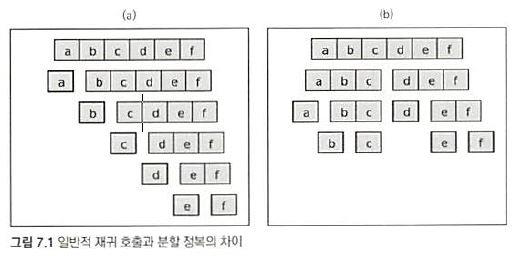

- 해결하고자 하는 문제를 둘 이상의 부분 문제로 나눈 뒤, 분할된 문제에 대한 답을 재귀 호출을 이용해 계산하고, 이를 통해 전체 문제의 답을 구하는 디자인
<br>
- 하나 vs 나머지로 나누는 일반적인 재귀함수와 달리 거의 같은 크기의 부분 문제로 나눔.
<br>
- 분할정복은 보통 세 단계로 진행된다.
    - ⓐ 분할(divide) 단계 : 해결하고자 하는 문제를 작은 크기의 동일한 문제들로 분할
    - ⓑ 정복(conquer) 단계 : 각각의 작은 문제를 동일한 방법으로 순환적(recursive)으로 해결
    - ⓒ 합정(merge) 단계 : 작은 문제의 해를 합하여(merge) 원래 문제에 대한 해를 구함  
<br>
- 분할(Divde), 병합(Merge), 곧장 풀 수 있는 작은 기저 문제 (Base case)로 구성
<br>
- 문제를 둘 이상의 부분 문제로 나누는 자연스러운 방법이 있어야 하며, 부분 문제의 답을 조합해 원래 문제의 답을 계산하는 방법이 존재해야함

>참고 링크 : https://jackpot53.tistory.com/68 / https://kimch3617.tistory.com/entry/%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EB%B6%84%ED%95%A0%EC%A0%95%EB%B3%B5%EB%B2%95-Divide-and-Conquer

## 7-1  merge sort (합병 정렬)

- 주어진 수열을 가운데에서 분할하여 두개로 쪼깸 (1이 될때까지 = base case)

- 정렬된 부분 배열들을 병합

- 정렬된 두 부분 수열을 합치는 데는 두 수열의 길이 합만큼 반복문을 수행 (그 전에 Subarray는 정렬이 되어 있기 때문에 첫 번째 원소가 보면서 합침)

- 병합 정렬의 수행시간은 병합 과정이 지배

- 아래 단계로 내려갈 수록 부분 문제의 수는 두 배로 늘어나는 대신 부분 문제의 크기 또한 반으로 줄어들기 때문에, 항상 𝚯(𝒏1)으로 일정

- 반으로 나누어 지기 때문에 총 단계 수는 log(n) <= 2^n = x, n = log (x)(밑이 2)

In [7]:
# assuming that left and right are sorted 
def merge(left, right):
    """
    left, right의 두 수열을 순서대로 합치는 함수
    두 수열 모두 정렬된 수열임을 가정
    
    """
    n1 = len(left)
    n2 = len(right)
    A=[]
    left.append(float('inf'))
    right.append(float('inf'))
# inf를 추가해서 한 쪽이 다 쓸 때 나머지가 들어갈 수 있게 
# inf보다 항상 작으므로
    i=0; j=0
    for k in range(n1+n2):
        if left[i] <= right[j]:
            A.append(left[i])
            i += 1
        else:
            A.append(right[j])
            j += 1
    return A

In [70]:
def merge_sort(A):
    if len(A) <= 1:
        return A
    q = len(A) // 2
    left = A[:q]
    right = A[q:]
    left = merge_sort(left)
    right = merge_sort(right)
    return merge(left,right)

In [71]:
# Example data
ex = [3,5,2,4,6,1]
merge_sort(ex)

[1, 2, 3, 4, 5, 6]

### Merge sort 시간 복잡도

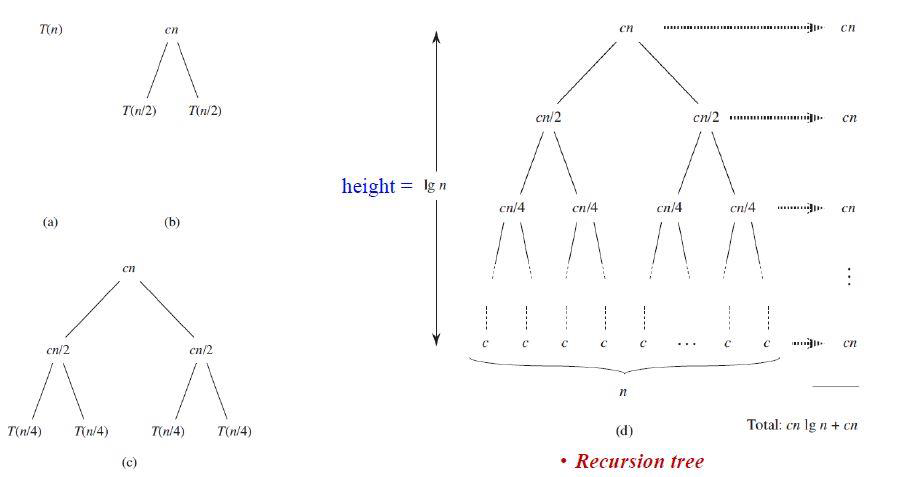


- **Θ(𝑛lg𝑛).**
- 가령 3개로 쪼갤 경우 전체 층의 수는 log(3)n이 되는데, 이는 로그의 성질에 의해 log(2)3 × log(2)n과 같다. 첫째 항은 상수이므로 매 층마다 3개씩 쪼개도 합병정렬의 계산복잡성은 Θ(𝑛lg𝑛)로 동일하다.

> 참고 링크 : https://pro-programmer.tistory.com/entry/kway-Merge-Sort%ED%95%A9%EB%B3%91-%EC%A0%95%EB%A0%AC%EC%9D%98-%EC%8B%9C%EA%B0%84%EB%B3%B5%EC%9E%A1%EB%8F%84-%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0  or <br> https://gmlwjd9405.github.io/2018/05/08/algorithm-merge-sort.html 

## 7-2  Quick sort (퀵 정렬)

- 파티션 단계를 도입
- 임의 기준 수 (pivot)을 지정하고 기준보다 작거나 같은 수를 왼쪽, 더 큰 숫자를 오른쪽으로 보내는 과정을 반복한다.
- 주어진 문제를 두 부분 무제로 나누는 파티션 과정이 대부분의 시간을 차지
- 분할된 두 부분 문제가 비슷한 크기로 나눠진다는 보장을 할 수 없음(임의적 선택으로 인한 pivot 크기에 따라)
- 최악의 경우에는 (pivot이 최소나 최대 원소인 경우) 시간 복잡도는 **Θ(𝑛^2)**
- 평균적으로 부분 문제가 절반에 가깝게 나눠질 때 시간 복잡도는 병합 정렬과 같다.

In [68]:
def quick_sort(A):
    if len(A) <= 1:
        return(A)
    pivot = A[0]
    left, mid, right = [],[],[]
    for i in A:
        if i < pivot:
            left.append(i)
        elif i > pivot :
            right.append(i)
        else:
            mid.append(i)
    return(quick_sort(left)+ mid +quick_sort(right))

In [69]:
# Example data
ex = [5,2,4,6,1,3,7]
quick_sort(ex)

[1, 2, 3, 4, 5, 6, 7]

### Qucik sort 시간 복잡도 (최악의 경우)

- **Θ(𝑛^2).**
- pivot을 최대, 최소 값을 뽑을 때 n번 pivot을 뽑아야 한다.
- 또한 각 단계에서 n번을 비교하기 때문에 n^2의 함수 꼴로 시간 복잡도가 표현된다.

> 참고 링크 : https://gmlwjd9405.github.io/2018/05/10/algorithm-quick-sort.html

In [ ]:
# FAN MEETING
def normalize(num):
"""
num의 자릿수 올림을 처리한다.
num: vector(list)
"""
num.append(0) #.
for i in range(len(num)-1):
if num[i] < 0:
borrow = (abs(num[i]) + 9) // 10 num[i+1] -= borrow
num[i] += borrow * 10
else:
num[i+1] += num[i] // 10 num[i] %= 10
while (len(num) > 1) & (num[-1] == 0): num.pop()
return
def multiply(a, b): """
,123*456=56088 ,a=[3,2,1] b=[6,5,4] [8, 8, 0, 6, 5] .
a, b: vector(list) a, b
c .
# void in C++: .
# num.push_back(0)
normalize ,a*b .
"""
#.
c = [0] * (len(a) + len(b) + 1) for i in range(len(a)):
for j in range(len(b)): c[i+j] += a[i] * b[j]
normalize(c) # return c

## 예시문제 - 8.2 와일드 카드 

문제는 다음과 같다.
1. 각 문제에서 주어진 와일드카드 패턴을 앞에서 한 글자씩 파일명과 비교하여 모든 글자가 일치 할 때 해당 와일드카드 패턴이 파일명과 대응된다고 할 수 있다.

2. '?' = 한 글짜로 어떤 문자열에도 대응된다.

3. '*' = 0 글자 이상의 어떤 문자열에도 대응된다.

예를 들어 he?p는 파일명 help, heap에도 대응되지만, helpp에는 대응되지 않는다(글자 수 매칭이 안됨)

반면 *p*는 파일명 help, papa에도 대응되지만, hello에는 대응되지 않는다(글자 p가 없음)

> 참고 : https://shoark7.github.io/programming/algorithm/Algospot-Wildcard-%EB%A7%A4%EC%B9%AD

### 8.2.1 와일드카드 문제를 해결하는 완전 탐색 알고리즘

In [68]:
def match(w,s):
    """
    와일드카드 패턴 w가 문자열 s에 대응되는지 여부를 반환한다.
    """
    pos = 0
    while((pos < len(s))and (pos < len(w)) and ((w[pos] =='?')or(w[pos] == s[pos]))):
        pos = pos + 1
    # 파이썬에는 index 넘으면 False가 아니라 error가 뜨기 때문에 break 문 추가
        if (pos == len(w)) or (pos == len(s)):
            break
    #패턴 끝에 도달해서 끝난 경우 : 문자열도 끝났어야 대응됨.
    if len(w) == pos:
        return(pos == len(s))
    #*을 만나서 끝난 경우: *에 몇 글자를 대응해야 할지 재귀 호출하면서 확인한다.
    if (w[pos]== '*'):
        for skip in range(len(s)-pos+1):
            if(match(w[pos+1:],s[pos+skip:])): 
    # skip은 *가 담을 글자 수 각 케이스 별로 완전 탐색
                return True
            skip += 1
    #이 외의 경우에는 모두 대응되지 않는다.
    return False

In [69]:
match('he?p','helpp')

False

이러한 알고리즘은 일부 예제 입력의 경우 너무 오래 걸릴 수 있다는 문제가 있음.

- 각 '*'에 대응되는 글자 수의 모든 조합을 검사
- 문자열이 길고 '*'가 많을 수록 경우의 수가 증가
- 가령 abc*def*ghi의 경우에서 def*ghi는 앞에 해결할 때 중복된다.

계산의 대부분이 여러 번 중복으로 이루어진다면, 입력이 주어졌을 때 답을 저장하는 캐시를 이용하여 프로그램을 빠르게 할 수 있다.

메모이제이션 구현 알고리즘은 다음과 같다,

- cache[w][s]는 패턴의 w번째에서 끝까지의 부분 열부터, 문자열의 s번째에서 끝까지의 부분수열과 매칭되는 지의 여부를 나타냄.
- cache의 크기를 잡을 때 패턴의 길이와 문자열의 길이 최대값(100)에 1을 더해야 함.
- 가령 패턴의 길이가 3인 'abc'가 주어지면 모든 부분 수열은 1)abc 2)bc 3)c 4)''가 나오기 때문

### 8.2.2 메모이제이션을 이용한 알고리즘

In [94]:
import numpy as np 
# -1은 아직 답이 계산되지 않았음을 의미한다.
# 1은 해당 입력들이 서로 대응됨을 의미한다.
# 0은 해당 입력들이 서로 대응되지 않았음을 의미한다.
cache = -1 * np.ones((101, 101))
def matchMemoized(W, S):
    w=0; s=0
    ret = cache[w][s]
    if (ret != -1):
        return ret
    while((s < len(S)) and (w < len(W)) and (W[w] == '?' or W[w] == S[s])):
           w += 1
           s += 1
    # 더 이상 대응할 수 없으면 왜 while문이 끝났는지 확인한다.
    # 패턴 끝에 도달해서 끝난 경우: 문자열도 끝났어야 참
    if(w == len(W)):
        ret = int(s == len(S))
        return ret  # True이면 1, False이면 0
    if(W[w] == '*'):
        for skip in range(len(S)-s+1):
            if(matchMemoized(W[w+1:], S[s+skip:])):
                ret = 1
                return ret
    else : 
        ret = 0
    return ret

In [96]:
matchMemoized('he?p','helpp')

0